In [ ]:
import numpy as np

# data processing
import pandas as pd


# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
#metrics calculation
from sklearn import metrics


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split



In [ ]:
data = pd.read_csv('Iris.csv')

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.columns
data.shape

(150, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Id,0,0.0
SepalLengthCm,0,0.0
SepalWidthCm,0,0.0
PetalLengthCm,0,0.0
PetalWidthCm,0,0.0


Preprocessing 1 no data is missing so no missing value treatment

In [ ]:
#converting categorical into numerical
labelencoder = LabelEncoder()
data['Species'] = labelencoder.fit_transform(data['Species'])
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
data.Species.unique()

array([0, 1, 2])

In [ ]:
data.groupby('Species').agg(['mean', 'median'])

Id        SepalLengthCm        SepalWidthCm        PetalLengthCm  \
          mean median          mean median         mean median          mean   
Species                                                                        
0         25.5   25.5         5.006    5.0        3.418    3.4         1.464   
1         75.5   75.5         5.936    5.9        2.770    2.8         4.260   
2        125.5  125.5         6.588    6.5        2.974    3.0         5.552   

               PetalWidthCm         
        median         mean median  
Species                             
0         1.50        0.244    0.2  
1         4.35        1.326    1.3  
2         5.55        2.026    2.0

Text(0.5, 1.0, 'Sepal Length in Cm')

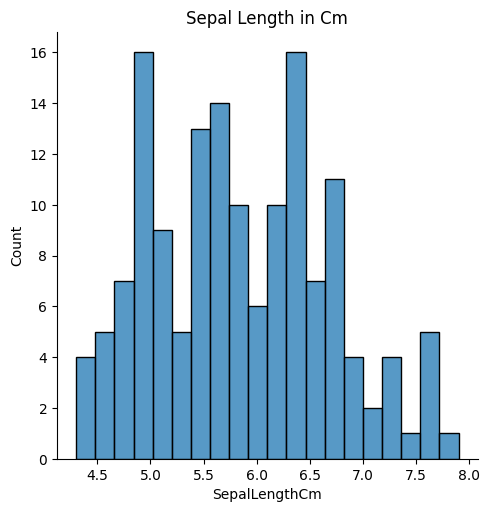

In [ ]:
sns.displot(data=data, x='SepalLengthCm', bins=20)
plt.title('Sepal Length in Cm')

Text(0.5, 1.0, 'SepalWidth in Cm')

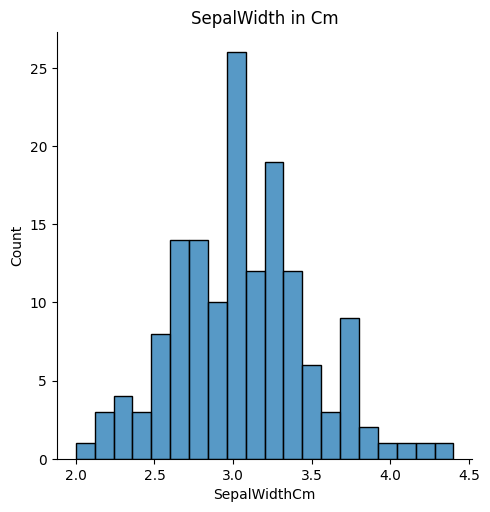

In [ ]:
sns.displot(data=data, x='SepalWidthCm', bins=20)
plt.title('SepalWidth in Cm')

Text(0.5, 1.0, 'PetalLengthCm in Cm')

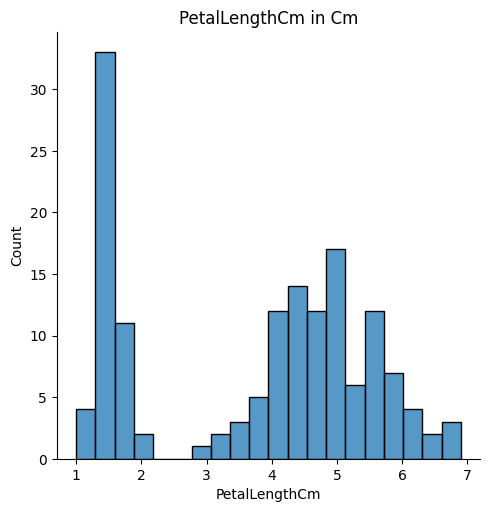

In [ ]:
sns.displot(data=data, x='PetalLengthCm', bins=20)
plt.title('PetalLengthCm in Cm')

Text(0.5, 1.0, 'PetalWidthCm in Cm')

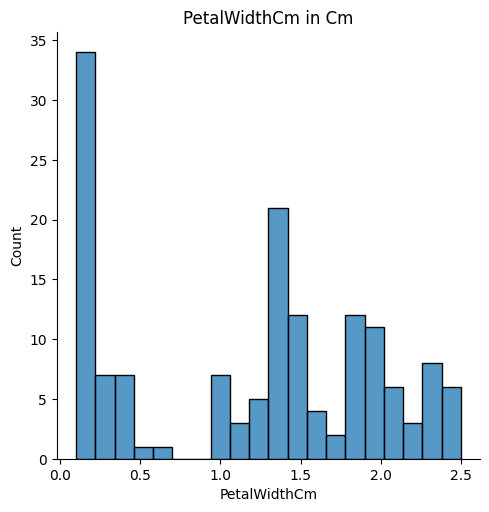

In [ ]:
sns.displot(data=data, x='PetalWidthCm', bins=20)
plt.title('PetalWidthCm in Cm')

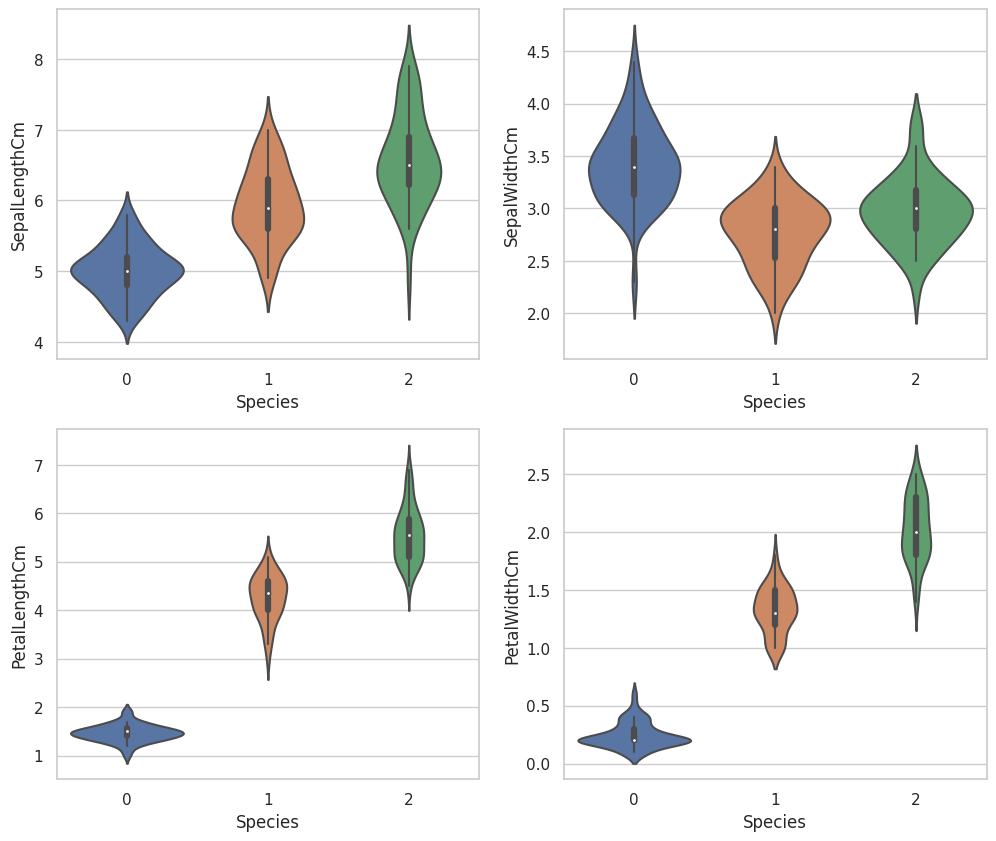

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.show()

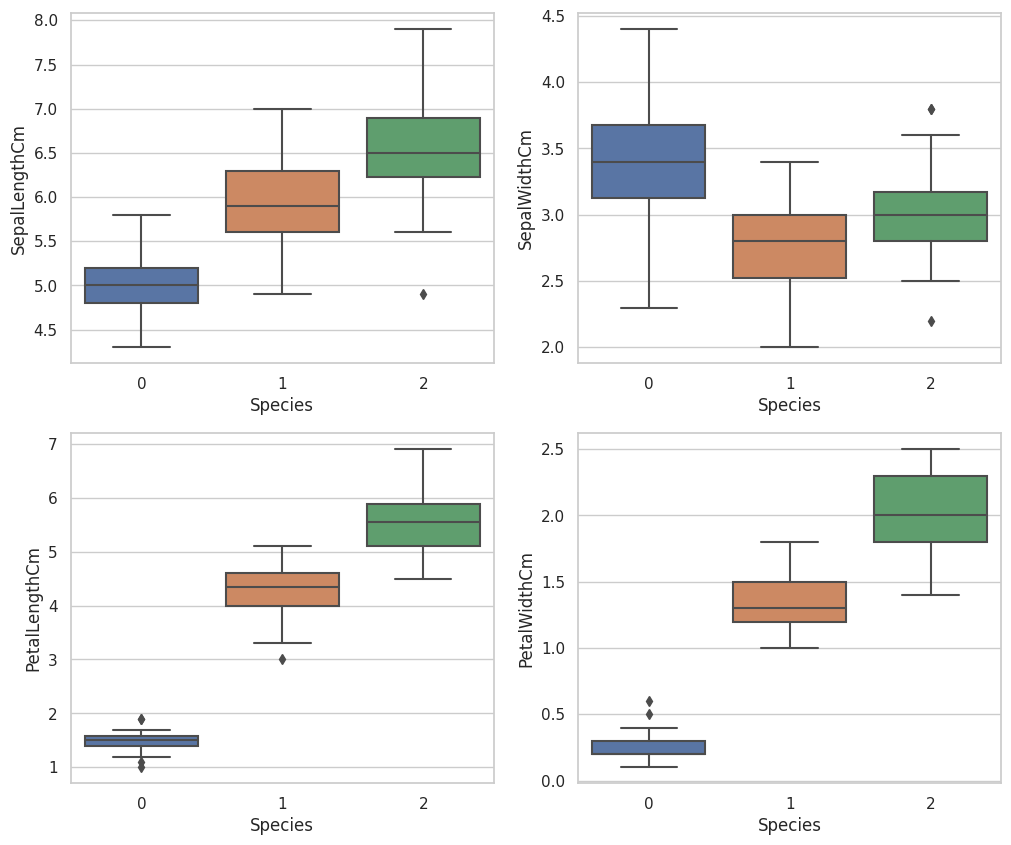

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalWidthCm',data=data)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm',data=data)
plt.show()

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Id               74.5
SepalLengthCm     1.3
SepalWidthCm      0.5
PetalLengthCm     3.5
PetalWidthCm      1.5
Species           2.0
dtype: float64


<Axes: >

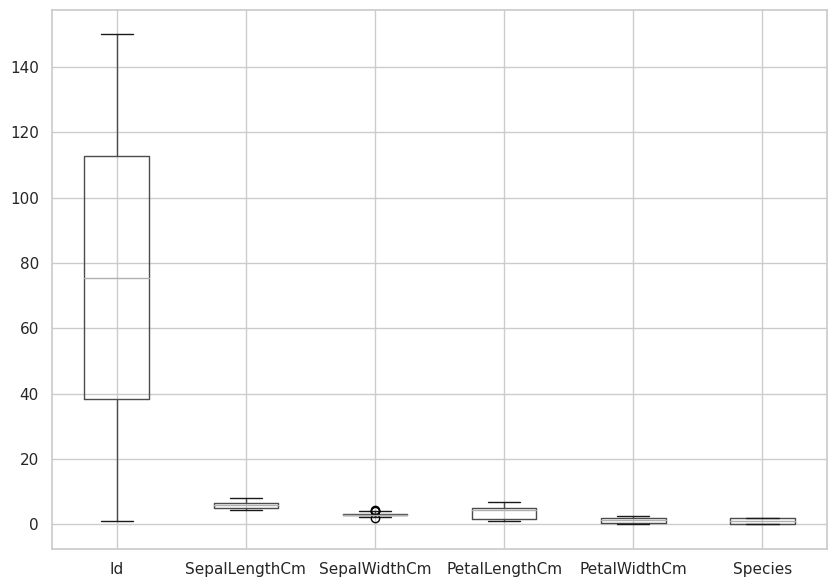

In [ ]:
plt.figure(figsize = (10,7))
data.boxplot()

In [ ]:
#removing outliers
#min=q1-1.5*IQR
#max=q3+1.5*IQR
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(146, 6)

In [ ]:
target = 'Species'
X = data.drop('Species', axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
#standard dising data
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [ ]:
#Principal Component Analysis
#pca = PCA(n_components=2)
#principalComponents_train = pca.fit_transform(X_train)#not taking PCA as it is lowering the accuracy
#principalComponents_test = pca.fit_transform(X_test)
principalComponents_train = (X_train)
principalComponents_test = (X_test)


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(principalComponents_train, y_train)
#predicting on train data to get train accuracy
Y_prediction = random_forest.predict(principalComponents_train)
#calcuate accuracy
random_forest.score(principalComponents_train, y_train)
acc_random_forest = round(random_forest.score(principalComponents_train, y_train) * 100, 2)
print(acc_random_forest)

100.0


In [ ]:
predictions = random_forest.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[36,  0,  0],
       [ 0, 39,  0],
       [ 0,  0, 41]])

In [ ]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        36
           1      1.000     1.000     1.000        39
           2      1.000     1.000     1.000        41

    accuracy                          1.000       116
   macro avg      1.000     1.000     1.000       116
weighted avg      1.000     1.000     1.000       116



In [ ]:
#random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
#random_forest.fit(principalComponents_test, y_test)
Y_prediction = random_forest.predict(principalComponents_test)
random_forest.score(principalComponents_test, y_test)
acc_random_forest_test = round(random_forest.score(principalComponents_test, y_test) * 100, 2)
print(acc_random_forest_test)

100.0


In [ ]:
predictions = random_forest.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  9]])

In [ ]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        11
           1      1.000     1.000     1.000        10
           2      1.000     1.000     1.000         9

    accuracy                          1.000        30
   macro avg      1.000     1.000     1.000        30
weighted avg      1.000     1.000     1.000        30



In [ ]:
gaussian = GaussianNB()
gaussian.fit(principalComponents_train, y_train)
Y_prediction = gaussian.predict(principalComponents_train)
gaussian.score(principalComponents_train, y_train)
acc_gaussian = round(gaussian.score(principalComponents_train, y_train) * 100, 2)
print(acc_gaussian)

99.14


In [ ]:
predictions = gaussian.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[36,  0,  0],
       [ 0, 39,  0],
       [ 0,  1, 40]])

In [ ]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        36
           1      0.975     1.000     0.987        39
           2      1.000     0.976     0.988        41

    accuracy                          0.991       116
   macro avg      0.992     0.992     0.992       116
weighted avg      0.992     0.991     0.991       116



In [ ]:
#gaussian = GaussianNB()
#gaussian.fit(principalComponents_test, y_test)
Y_prediction = gaussian.predict(principalComponents_test)
gaussian.score(principalComponents_test, y_test)
acc_gaussian_test = round(gaussian.score(principalComponents_test, y_test) * 100, 2)
print(acc_gaussian_test)

100.0


In [ ]:
predictions = gaussian.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  9]])

In [ ]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        11
           1      1.000     1.000     1.000        10
           2      1.000     1.000     1.000         9

    accuracy                          1.000        30
   macro avg      1.000     1.000     1.000        30
weighted avg      1.000     1.000     1.000        30



In [ ]:
logreg = LogisticRegression()
logreg.fit(principalComponents_train, y_train)
Y_pred = logreg.predict(principalComponents_train)
acc_log = round(logreg.score(principalComponents_train, y_train) * 100, 2)
print(acc_log)

100.0


In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict
CVS=cross_val_score(logreg,principalComponents_train,y_train,cv=3)
print(CVS)                                                                      #Cross Validation
CVP=cross_val_predict(logreg,principalComponents_train,y_train,cv=3)
confusion_matrix(y_train,CVP)

[0.97435897 1.         1.        ]


array([[36,  0,  0],
       [ 0, 39,  0],
       [ 0,  1, 40]])

In [ ]:
predictions = logreg.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[36,  0,  0],
       [ 0, 39,  0],
       [ 0,  0, 41]])

In [ ]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        36
           1      1.000     1.000     1.000        39
           2      1.000     1.000     1.000        41

    accuracy                          1.000       116
   macro avg      1.000     1.000     1.000       116
weighted avg      1.000     1.000     1.000       116



In [ ]:
#logreg = LogisticRegression()
#logreg.fit(principalComponents_test, y_test)
Y_pred = logreg.predict(principalComponents_test)
acc_log_test = round(logreg.score(principalComponents_test, y_test) * 100, 2)
print(acc_log_test)

100.0


In [ ]:
predictions = logreg.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  9]])

In [ ]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(principalComponents_train,y_train)
Y_pred=decisiontree.predict(principalComponents_train)
acc_dt=round(decisiontree.score(principalComponents_train, y_train) * 100, 2)
print(acc_dt)

100.0


In [ ]:
predictions = decisiontree.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[36,  0,  0],
       [ 0, 39,  0],
       [ 0,  0, 41]])

In [ ]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        36
           1      1.000     1.000     1.000        39
           2      1.000     1.000     1.000        41

    accuracy                          1.000       116
   macro avg      1.000     1.000     1.000       116
weighted avg      1.000     1.000     1.000       116



In [ ]:
#decisiontree=DecisionTreeClassifier()
#decisiontree.fit(principalComponents_test,y_test)
Y_pred=decisiontree.predict(principalComponents_test)
acc_dt_test=round(decisiontree.score(principalComponents_test, y_test) * 100, 2)
print(acc_dt_test)

100.0


In [ ]:
predictions = decisiontree.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  9]])

In [ ]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        11
           1      1.000     1.000     1.000        10
           2      1.000     1.000     1.000         9

    accuracy                          1.000        30
   macro avg      1.000     1.000     1.000        30
weighted avg      1.000     1.000     1.000        30



In [ ]:
svc=LinearSVC()
svc.fit(principalComponents_train,y_train)
Y_pred=svc.predict(principalComponents_train)
acc_svc=round(svc.score(principalComponents_train, y_train) * 100, 2)
print(acc_svc)



100.0


In [ ]:
predictions = svc.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[36,  0,  0],
       [ 0, 39,  0],
       [ 0,  0, 41]])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        36
           1      1.000     1.000     1.000        39
           2      1.000     1.000     1.000        41

    accuracy                          1.000       116
   macro avg      1.000     1.000     1.000       116
weighted avg      1.000     1.000     1.000       116



In [ ]:
#svc=LinearSVC()
#svc.fit(principalComponents_test,y_test)
Y_pred=svc.predict(principalComponents_test)
acc_svc_test=round(svc.score(principalComponents_test, y_test) * 100, 2)
print(acc_svc_test)


100.0


In [ ]:
predictions = svc.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  9]])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        11
           1      1.000     1.000     1.000        10
           2      1.000     1.000     1.000         9

    accuracy                          1.000        30
   macro avg      1.000     1.000     1.000        30
weighted avg      1.000     1.000     1.000        30



In [ ]:
y_true=predictions

In [ ]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'gaussian',
              'Decision Tree',
              'LinearSVC'
              ],
    'training_Score': [ acc_log, acc_random_forest, acc_gaussian, acc_dt ,acc_svc ]})
result_df = results.sort_values(by='training_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,training_Score
Model,
Logistic Regression,100.00
Random Forest,100.00
Decision Tree,100.00
LinearSVC,100.00
gaussian,99.14


In [ ]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'gaussian',
              'Decision Tree',
              'LinearSVC'
              ],
    'Testing_Score': [ acc_log_test, acc_random_forest_test, acc_gaussian_test, acc_dt_test ,acc_svc_test ]})
result_df = results.sort_values(by='Testing_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,Testing_Score
Model,
Logistic Regression,100.0
Random Forest,100.0
gaussian,100.0
Decision Tree,100.0
LinearSVC,100.0
